In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization ,experimental
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow import keras
from keras.models import Model

## Two Class Classification of Skin_Cancer Dataset

In [55]:
trainpath = 'Skin_Cancer/train'
testpath = 'Skin_Cancer/test' 

## Train Image

In [56]:
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.jpg'))
  print("Number of images in the folder is",len(files))
  for j in files:
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_cancer[i])

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


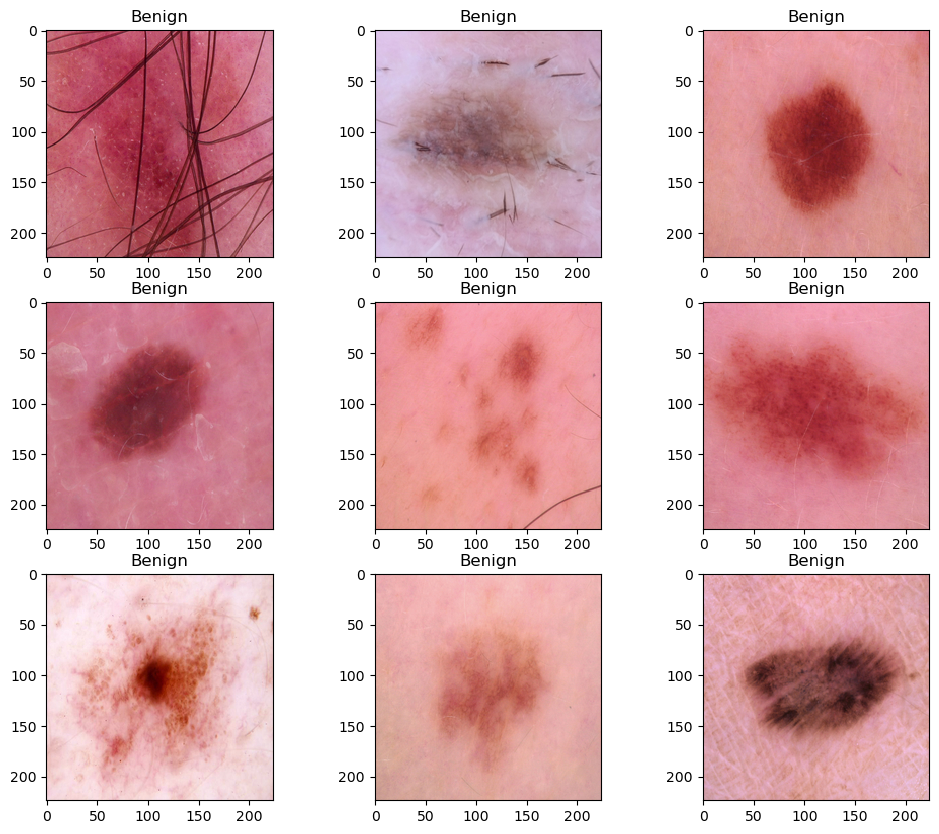

In [57]:
w=40
h=30
fig=plt.figure(figsize=(12, 10))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

## Test Image

In [58]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.jpg'))
  print("Number of images in the folder is",len(files))
  for j in files:
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_cancer[i])

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


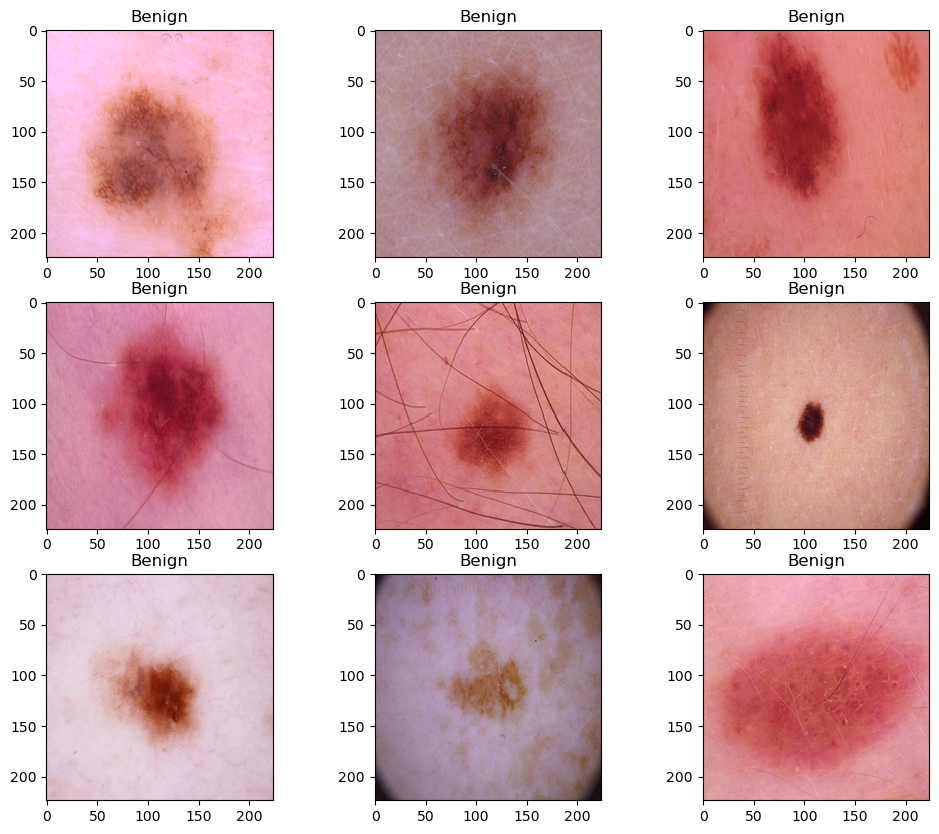

In [59]:
w=40
h=30
fig=plt.figure(figsize=(12, 10))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [60]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)

In [61]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(50, 224, 224, 3)
********************
(50,)
********************
(50, 224, 224, 3)
(50,)


In [62]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)
y_train1=y_train
y_test1=y_test
y_train,y_test=keras_to_categorical(y_train,y_test)

In [63]:
y_train1.shape,y_test1.shape

((50,), (50,))

### Using a pretrained VGG-16 model on Imagenet dataset by removing the top fully connected layers and adding three dense layers having 64, 32 and 2 neurons with relu, sigmoid and softmax activation functions respectively for classifying the two class Skin_Cancer RGB dataset.

In [64]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  for layer in VGG_model.layers:
    layer.trainable = False
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  d3=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  output = Model(inputs =VGG_model.input, outputs =d3)
  
  return output

In [65]:
for _ in range(5):
    model16= model_vgg16()
    model16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
    history=model16.fit(X_train, y_train, validation_split=0.2,epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test))
    test_loss, test_accuracy = model16.evaluate(X_test, y_test, verbose=0)
    train_accuracy = history.history['accuracy'][-1]
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

Epoch 1/10
10/10 [==============================] - 11s 1s/step - loss: 0.2635 - accuracy: 0.5000 - val_loss: 0.1913 - val_accuracy: 0.8200
Epoch 2/10
10/10 [==============================] - 10s 1s/step - loss: 0.1800 - accuracy: 0.7200 - val_loss: 0.1907 - val_accuracy: 0.7000
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 0.1140 - accuracy: 0.9200 - val_loss: 0.1372 - val_accuracy: 0.8400
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 0.0904 - accuracy: 0.9200 - val_loss: 0.1189 - val_accuracy: 0.8400
Epoch 5/10
10/10 [==============================] - 10s 1s/step - loss: 0.0610 - accuracy: 0.9600 - val_loss: 0.1253 - val_accuracy: 0.8200
Epoch 6/10
10/10 [==============================] - 10s 1s/step - loss: 0.0472 - accuracy: 0.9800 - val_loss: 0.1103 - val_accuracy: 0.8800
Epoch 7/10
10/10 [==============================] - 10s 1s/step - loss: 0.0354 - accuracy: 0.9800 - val_loss: 0.1106 - val_accuracy: 0.8600
Epoch 8/10
10/10 [==

### Using a pretrained VGG-16 model on Imagenet dataset by removing the top fully connected layers and extracting the deep features and modelling them using a Random Forest classifier for classifying the two class Skin_Cancer RGB dataset.

In [66]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  for layer in VGG_model.layers:
    layer.trainable = False
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_16=model_vgg16()

In [67]:
model_FE_16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_16=model_FE_16.predict(X_train)
test_feature_16=model_FE_16.predict(X_test)

2/2 [==============================] - 5s 2s/step


In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_16,y_train)
train_pred=rf.predict(train_feature_16)
test_pred=rf.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.76


### Using pretrained VGG-16 and VGG-19 model on Imagenet dataset by removing the top fully connected layers and extract the deep features, fuse the deep features and model them using a Random Forest classifier for classifying the two class Skin_Cancer RGB dataset.

### Extracting features using VGG19

In [69]:
def model_vgg19():
  VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  for layer in VGG_model.layers:
    layer.trainable = False
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_19=model_vgg19()

In [70]:
model_FE_19.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

2/2 [==============================] - 6s 2s/step


In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_19,y_train)
train_pred=rf.predict(train_feature_19)
test_pred=rf.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.84


### Fusing deep feature of VGG16 model and VGG19 model

In [72]:
final_train=np.hstack((train_feature_16,train_feature_19))
final_test=np.hstack((test_feature_16,test_feature_19))

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(final_train,y_train)
train_pred=rf.predict(final_train)
test_pred=rf.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.82


## Three Class Classification of Orange_Dataset

In [74]:
trainpath = 'Orange_Dataset/train'
testpath = 'Orange_Dataset/test'

## Train Image

In [75]:
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.jpg'))
  print("Number of images in the folder is",len(files))
  for j in files:
      class_orange={'Anthracnose':0,'BlackSpot':1,'Healthy':2}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_orange[i])

Entering to the folder name: Anthracnose
Number of images in the folder is 30
Entering to the folder name: BlackSpot
Number of images in the folder is 30
Entering to the folder name: Healthy
Number of images in the folder is 30


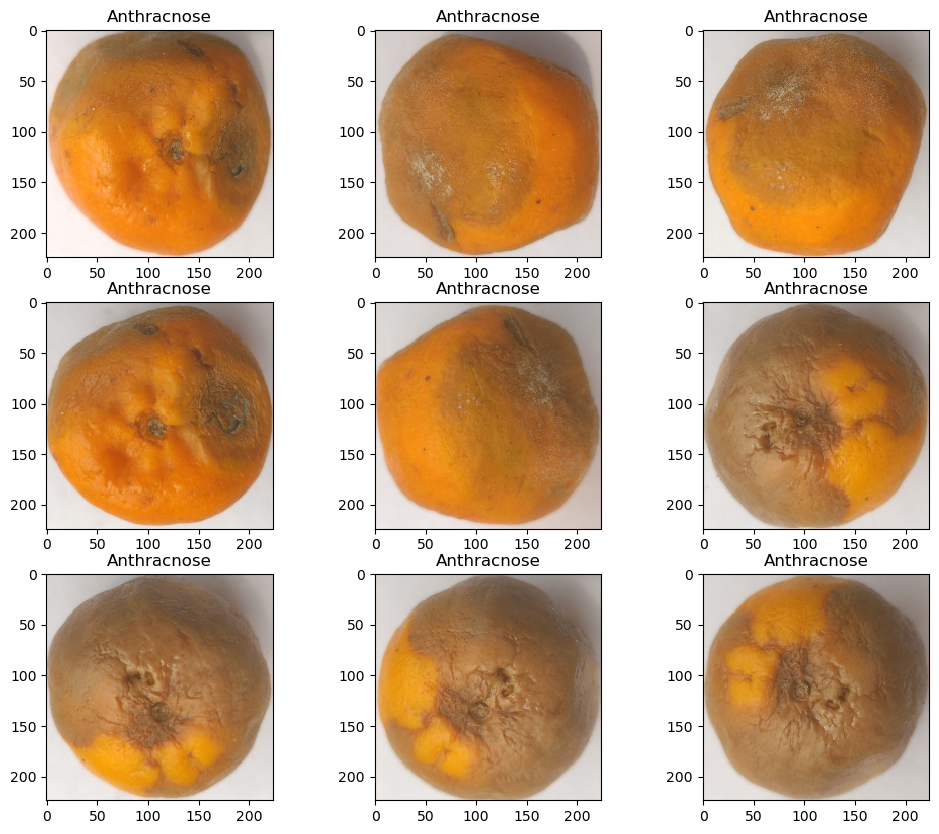

In [76]:
w=40
h=30
fig=plt.figure(figsize=(12, 10))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('Anthracnose')
    elif train_labels[i]==1:
        ax.title.set_text('BlackSpot')
    else:
        ax.title.set_text('Healthy')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

## Test Image

In [77]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.jpg'))
  print("Number of images in the folder is",len(files))
  for j in files:
      class_orange={'Anthracnose':0,'BlackSpot':1,'Healthy':2}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_orange[i])

Entering to the folder name: Anthracnose
Number of images in the folder is 25
Entering to the folder name: BlackSpot
Number of images in the folder is 25
Entering to the folder name: Healthy
Number of images in the folder is 25


In [78]:
w=40
h=30
fig=plt.figure(figsize=(12, 10))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('Anthracnose')
    elif train_labels[i]==1:
        ax.title.set_text('BlackSpot')
    else:
        ax.title.set_text('Healthy')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [79]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)

In [80]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(90, 224, 224, 3)
********************
(90,)
********************
(75, 224, 224, 3)
(75,)


In [81]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)
y_train1=y_train
y_test1=y_test
y_train,y_test=keras_to_categorical(y_train,y_test)

In [82]:
y_train1.shape,y_test1.shape

((90,), (75,))

### Using a pretrained VGG-16 model on Imagenet dataset by removing the top fully connected layers and adding three dense layers having 64, 32 and 3 neurons with relu, sigmoid and softmax activation functions respectively for classifying the three class Orange_Dataset RGB dataset.

In [83]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  for layer in VGG_model.layers:
    layer.trainable = False
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  d3=Dense(units=3,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  output = Model(inputs =VGG_model.input, outputs =d3)
  
  return output

In [84]:
for _ in range(3):
    model16= model_vgg16()
    model16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
    history=model16.fit(X_train, y_train, validation_split=0.2,epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test))
    test_loss, test_accuracy = model16.evaluate(X_test, y_test, verbose=0)
    train_accuracy = history.history['accuracy'][-1]
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)


Epoch 1/10
18/18 [==============================] - 17s 931ms/step - loss: 0.1308 - accuracy: 0.7000 - val_loss: 0.1317 - val_accuracy: 0.7600
Epoch 2/10
18/18 [==============================] - 16s 909ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 3/10
18/18 [==============================] - 16s 919ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 16s 912ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 16s 940ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 6/10
18/18 [==============================] - 17s 957ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 16s 929ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000

### Using a pretrained VGG-16 model on Imagenet dataset by removing the top fully connected layers and extracting the deep features and modelling them using a Random Forest classifier for classifying the three class Orange_Dataset RGB dataset.


In [85]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  for layer in VGG_model.layers:
    layer.trainable = False
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_16=model_vgg16()

In [86]:
model_FE_16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_16=model_FE_16.predict(X_train)
test_feature_16=model_FE_16.predict(X_test)

3/3 [==============================] - 7s 2s/step


In [87]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_16,y_train)
train_pred=rf.predict(train_feature_16)
test_pred=rf.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 1.0


### Using pretrained VGG-16 and VGG-19 model on Imagenet dataset by removing the top fully connected layers and extract the deep features, fuse the deep features and model them using a Random Forest classifier for classifying the three class Orange_Dataset RGB dataset.

In [88]:
def model_vgg19():
  VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  for layer in VGG_model.layers:
    layer.trainable = False
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_19=model_vgg19()

In [89]:
model_FE_19.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

3/3 [==============================] - 8s 2s/step


In [90]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_19,y_train)
train_pred=rf.predict(train_feature_19)
test_pred=rf.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 1.0


### Fusing deep feature of VGG16 model and VGG19 model

In [91]:
final_train=np.hstack((train_feature_16,train_feature_19))
final_test=np.hstack((test_feature_16,test_feature_19))

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(final_train,y_train)
train_pred=rf.predict(final_train)
test_pred=rf.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 1.0
